# <font color='green'>Help NGO

HELP International is an international humanitarian NGO that is committed to fighting poverty and providing the people of backward countries with basic amenities and relief during the time of disasters and natural calamities. It runs a lot of operational projects from time to time along with advocacy drives to raise awareness as well as for funding purposes.

After the recent funding programmes, they have been able to raise around $ 10 million. Now the CEO of the NGO needs to decide how to use this money strategically and effectively. The significant issues that come while making this decision are mostly related to choosing the countries that are in the direst need of aid. 


- country = Name of the country
- child_mort = Death of children under 5 years of age per 1000 live births
- exports = Exports of goods and services per capita. Given as %age of the GDP per capita
- health = Total health spending per capita. Given as %age of GDP per capita
- imports = Imports of goods and services per capita. Given as %age of the GDP per capita
- Income = Net income per person
- Inflation = The measurement of the annual growth rate of the Total GDP
- life_expec = The average number of years a new born child would live if the current mortality patterns are to remain the same
- total_fer = The number of children that would be born to each woman if the current age-fertility rates remain the same.
- gdpp = The GDP per capita. Calculated as the Total GDP divided by the total population.

### Import required Library

In [449]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [450]:
## import the Dataset
inp = pd.read_csv('Country-data.csv')
inp.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [451]:
## check the shape of dataset
inp.shape

## 167 rows and 10 columns

(167, 10)

In [452]:
## check the Datatypes in the dataframe
inp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


### EDA

In [453]:
## to check the pairs in the dataframe
#sns.pairplot(inp)
plt.show()

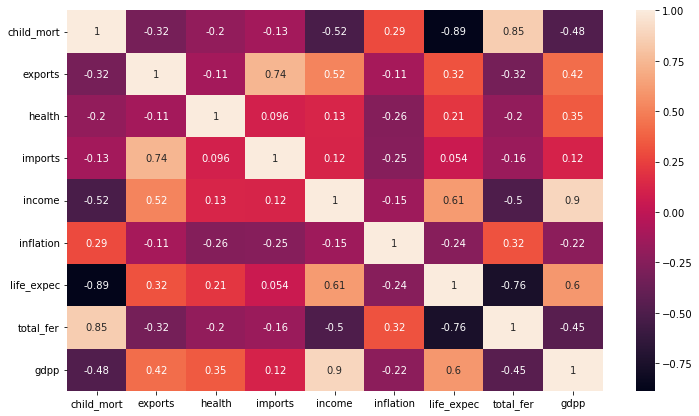

In [454]:
## check the correlation 
plt.figure(figsize=(12,7))
sns.heatmap(inp.corr(), annot=True)
plt.show()

- Low Correlation values in life_expec and child_mort of -0.89
- High Correlation value in income and gdpp 0.9 and child_mort and total_fer of 0.85

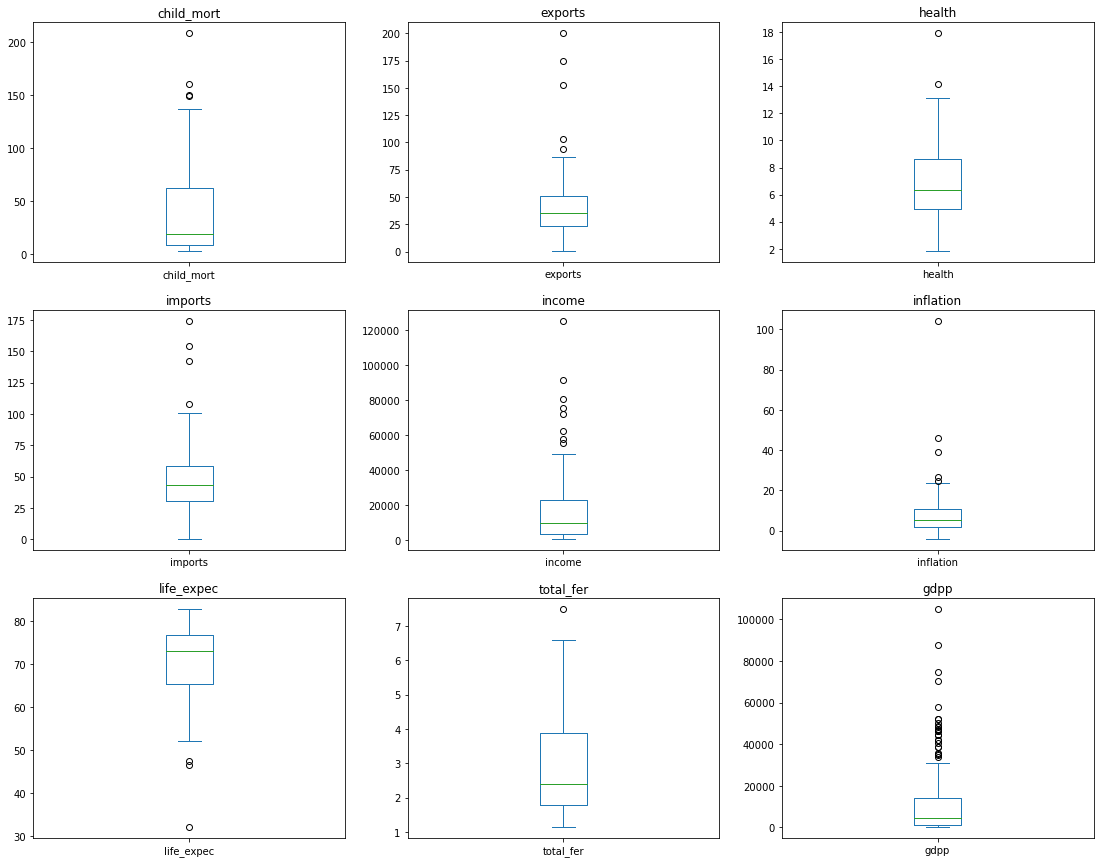

In [455]:
## view the numerical value check the outliers
num = inp.select_dtypes(np.number)
for num,col in enumerate(num):
    plt.subplot(3,3,num+1)
    inp[col].plot.box(figsize=(19,15))
    plt.title(col)
plt.show()

In [456]:
## describe the dataset in the percentiles
inp.describe(percentiles=[0.05,0.25,0.50,0.75,0.95,0.99])

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
5%,3.460000,12.120000,2.791000,18.130000,1213.000000,0.183400,55.780000,1.390000,465.900000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
95%,116.000000,80.570000,11.570000,81.140000,48290.000000,20.870000,81.400000,5.861000,48610.000000
99%,153.400000,160.480000,13.474000,146.080000,84374.000000,41.478000,82.370000,6.563600,79088.000000


 - comparing to the other values we need to handle outliers in income and gdpp


### Data Preparation

In [457]:
inp['health'] = (inp['health']*inp['gdpp']/100)
inp['imports'] = (inp['imports']*inp['gdpp']/100)
inp['exports'] = (inp['exports']*inp['gdpp']/100)
inp.head(2)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.3,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.2,267.8950,1987.740,9930,4.49,76.3,1.65,4090


In [458]:
### Check missing values in the dataframe
round(100*(inp.isnull().sum()/len(inp.index)),2)

country       0.0
child_mort    0.0
exports       0.0
health        0.0
imports       0.0
income        0.0
inflation     0.0
life_expec    0.0
total_fer     0.0
gdpp          0.0
dtype: float64

- No Missing values

### Hopkins Test

- Check the Dataset is suitable for clustering algorithm or not
    - If the value is between {0.01, ...,0.3}, the data is regularly spaced.
    - If the value is around 0.5, it is random.
    - If the value is between {0.7, ..., 0.99}, it has a high tendency to clustering method.

In [459]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [460]:
hopkins(inp.drop('country',axis=1))

0.9832317774020151

- we are getting around 0.94 it is clustering tendancy

### Scaling the varaibles

In [461]:
inp = inp.copy()
inp1 = inp.drop('country',axis=1)

In [462]:
## import scaling library
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

inp1_scale = scaler.fit_transform(inp1)
inp1_scale = pd.DataFrame(inp1_scale)
inp1_scale.columns = ['child_mort', 'exports', 'health', 'imports', 'income', 'inflation','life_expec', 'total_fer', 'gdpp']
inp1_scale.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-0.411011,-0.565040,-0.432276,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,-0.538949,-0.350191,-0.439218,-0.313677,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,-0.272833,-0.318526,-0.484826,-0.353720,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,2.007808,-0.291375,-0.532363,-0.345953,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,-0.695634,-0.104331,-0.178771,0.040735,0.101732,-0.601749,0.704258,-0.541946,-0.041817


### KMeans

In [463]:
## Library for kmeans algorithm
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

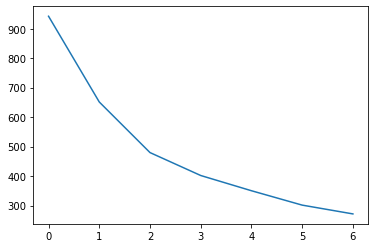

In [464]:
## Elbow curve for kmeans

num_feature = list(range(2,9))
score = []
for num in num_feature:
    kmeans = KMeans(n_clusters=num, max_iter=50)
    kmeans.fit(inp1_scale)
    score.append(kmeans.inertia_)
plt.plot(score)
plt.show()

In [465]:
## silhouette Analysis

num_feature = list(range(2,9))
sil_score = []
for num in num_feature:
    kmeans = KMeans(n_clusters=num, max_iter=50)
    kmeans.fit(inp1_scale)
    sil_score.append([num, silhouette_score(inp1_scale, kmeans.labels_)])
sil_score = pd.DataFrame(sil_score)
sil_score.columns = ['n_cluster','silhouette_score']
sil_score

,n_cluster,silhouette_score
0,2,0.458633
1,3,0.421862
2,4,0.429147
3,5,0.432400
4,6,0.392794
5,7,0.306334
6,8,0.301253


- considering the elbow curve we are taking k cluster=3

In [466]:
## after doing elbow curve and silhouette score we take k cluster as 3

kmeans = KMeans(n_clusters=3, max_iter=100, random_state=100)
kmeans.fit(inp1_scale)

inp['kmean_label'] = kmeans.labels_

inp.head(3)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,kmean_label
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,1
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090,2
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,2


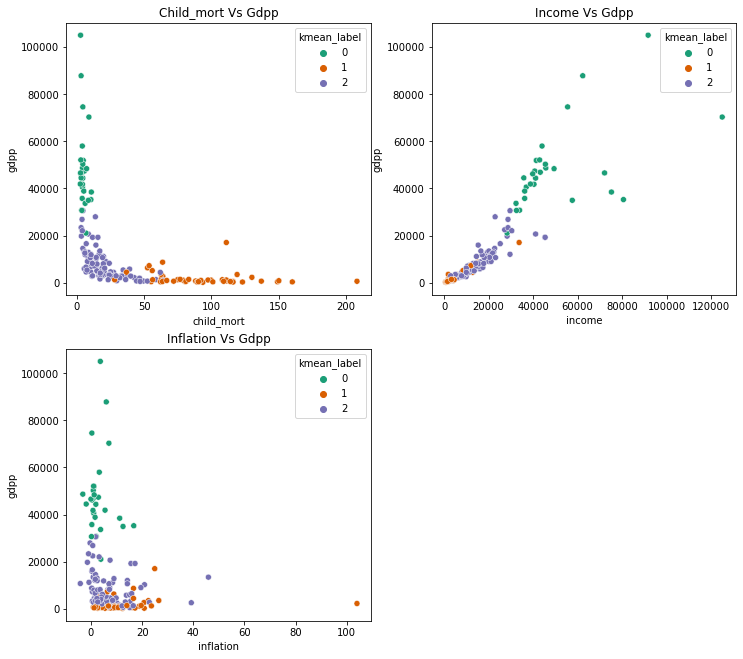

In [467]:
## visualize the dataframe by using kmeans label in the child_mort, income, inflation
plt.figure(figsize=(12,11))

plt.subplot(2,2,1)
sns.scatterplot(data=inp, x='child_mort', y='gdpp', hue='kmean_label', palette='Dark2')
plt.title('Child_mort Vs Gdpp')

plt.subplot(2,2,2)
sns.scatterplot(data=inp, x='income', y='gdpp', hue='kmean_label', palette='Dark2')
plt.title('Income Vs Gdpp')

plt.subplot(2,2,3)
sns.scatterplot(data=inp, x='inflation', y='gdpp', hue='kmean_label', palette='Dark2')
plt.title('Inflation Vs Gdpp')

plt.show()

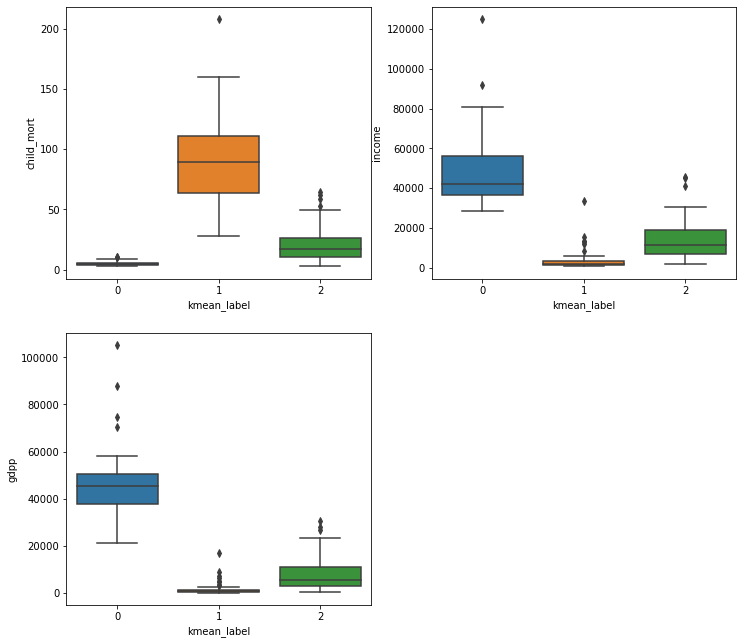

In [468]:
## visualize the child_mort, income, gdpp vs kmean_label
plt.figure(figsize=(12,11))

plt.subplot(2,2,1)
sns.boxplot(data=inp, x='kmean_label', y='child_mort')

plt.subplot(2,2,2)
sns.boxplot(data=inp, x='kmean_label', y='income')

plt.subplot(2,2,3)
sns.boxplot(data=inp, x='kmean_label', y='gdpp')

plt.show()

In [469]:
## take the kmean_label as ==1 to fing top 10 countries
top_10 = inp[inp['kmean_label']==1].sort_values(by=['child_mort','income','gdpp'], ascending=[False,True,True])
top_10 = top_10.iloc[:,0]
top_10 = top_10.reset_index()
top_10.drop('index',axis=1,inplace=True)
top_10.head(11)

,country
0,Haiti
1,Sierra Leone
2,Chad
3,Central African Republic
4,Mali
5,Nigeria
6,Niger
7,Angola
8,"Congo, Dem. Rep."
9,Burkina Faso


### Hierarchical Clustering

In [470]:
## import hierarchical clustering library

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

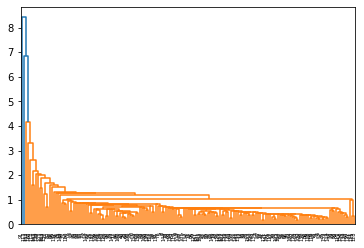

In [471]:
## single linkage method
merge = linkage(inp1_scale, method='single', metric='euclidean')
dendrogram(merge)
plt.show()

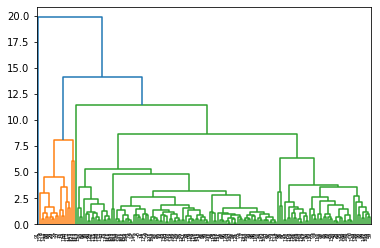

In [472]:
## complete linkage method 
merge = linkage(inp1_scale, method='complete', metric='euclidean')
dendrogram(merge)
plt.show()

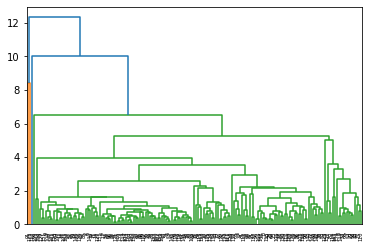

In [473]:
## Average linkage method 
merge = linkage(inp1_scale, method='average', metric='euclidean')
dendrogram(merge)
plt.show()

In [474]:
## using cut_tree method find the hierarchy labels 
inp['hierarchy_label'] = cut_tree(Z=merge, n_clusters=3)
inp.head()           

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,kmean_label,hierarchy_label
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,1,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090,2,0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,2,0
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530,1,0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,2,0


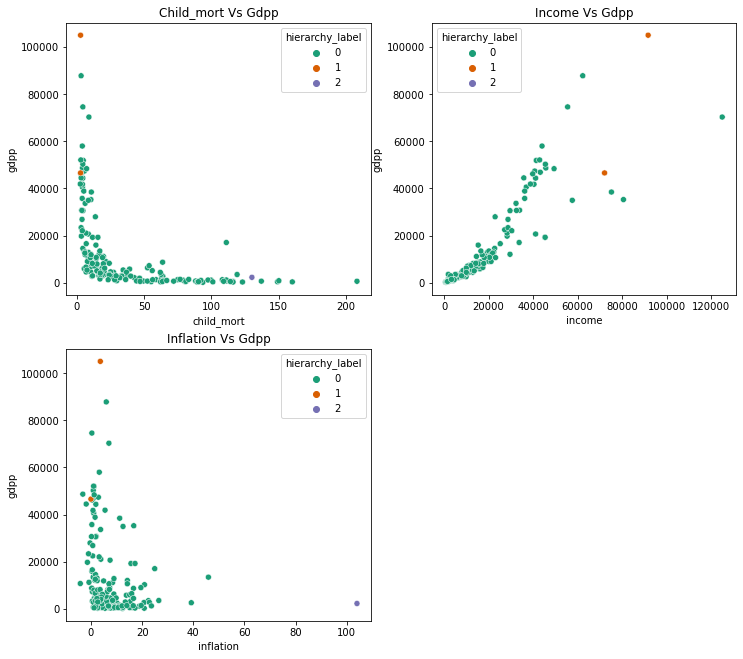

In [475]:
## visualize the dataframe by using hierarchy_label in the child_mort, income, inflation
plt.figure(figsize=(12,11))

plt.subplot(2,2,1)
sns.scatterplot(data=inp, x='child_mort', y='gdpp', hue='hierarchy_label', palette='Dark2')
plt.title('Child_mort Vs Gdpp')

plt.subplot(2,2,2)
sns.scatterplot(data=inp, x='income', y='gdpp', hue='hierarchy_label', palette='Dark2')
plt.title('Income Vs Gdpp')

plt.subplot(2,2,3)
sns.scatterplot(data=inp, x='inflation', y='gdpp', hue='hierarchy_label', palette='Dark2')
plt.title('Inflation Vs Gdpp')

plt.show()

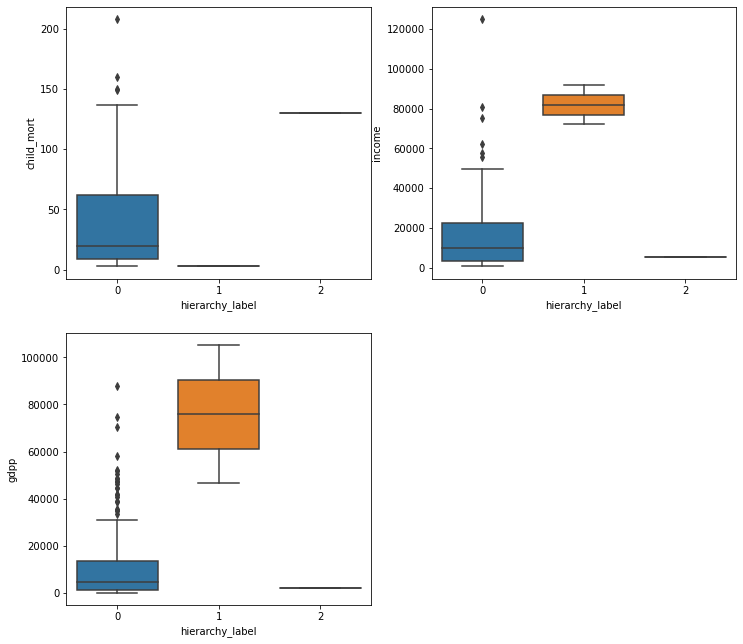

In [476]:
## visualize the child_mort, income, gdpp vs hierarchy_label
plt.figure(figsize=(12,11))

plt.subplot(2,2,1)
sns.boxplot(data=inp, x='hierarchy_label', y='child_mort')

plt.subplot(2,2,2)
sns.boxplot(data=inp, x='hierarchy_label', y='income')

plt.subplot(2,2,3)
sns.boxplot(data=inp, x='hierarchy_label', y='gdpp')

plt.show()

In [477]:
## find top 10 countries 
top_10 = inp[inp['hierarchy_label']==0].sort_values(by=['child_mort','income','gdpp'], ascending=[False,True,True])
top_10 = top_10.iloc[:,0]
top_10 = top_10.reset_index()
top_10.drop('index',axis=1,inplace=True)
top_10.head(11)

,country
0,Haiti
1,Sierra Leone
2,Chad
3,Central African Republic
4,Mali
5,Niger
6,Angola
7,"Congo, Dem. Rep."
8,Burkina Faso
9,Guinea-Bissau


 - CEO needs to focus on the most Countries are:
    - Haiti
    - Sierra Leone
    - Chad
    - Central African Republic
    - Mali
    - Nigeria
    - Niger
    - Angola
    - Congo, Dem. Rep.
    - Burkina Faso
    - Guinea-Bissau